In [26]:
#import necessary libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for Poland Data Analyst roles

In [27]:
df_DA_PL = df[(df['job_country'] == 'Poland') & (df['job_title_short'] == 'Data Analyst')]

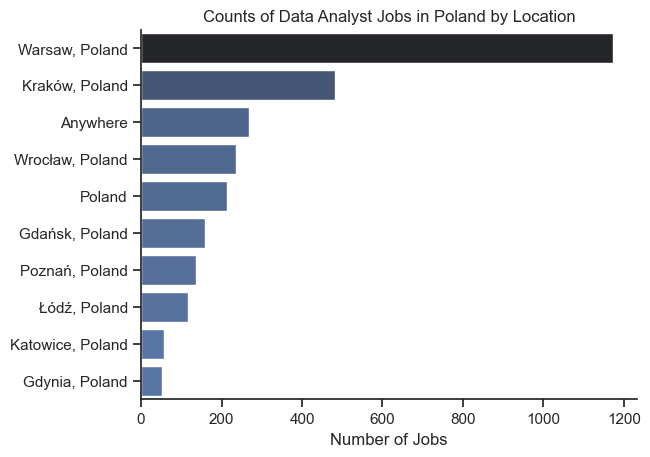

In [28]:
df_plot = df_DA_PL['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x='count', y='job_location', hue = 'count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Data Analyst Jobs in Poland by Location')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


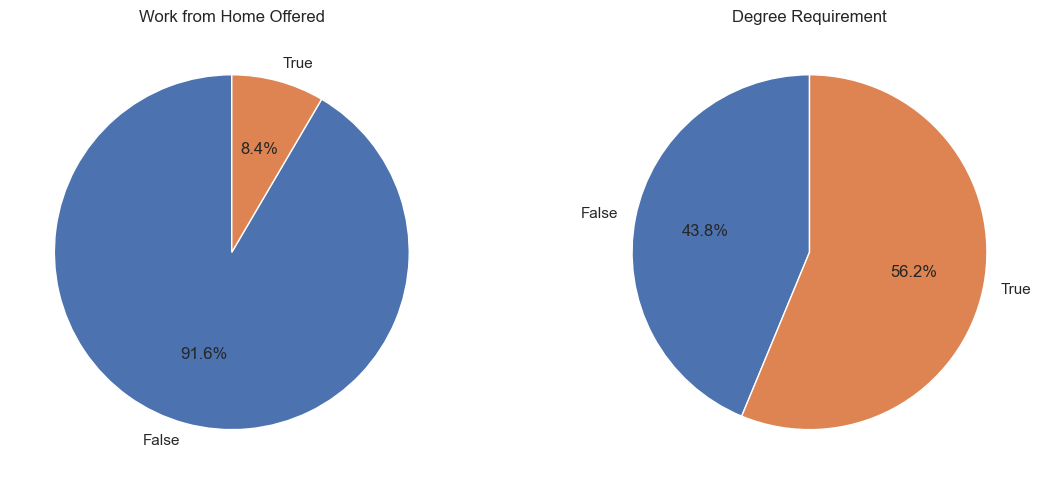

In [38]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
}

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = ax.flatten() 

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_PL[column].value_counts().reindex([False, True], fill_value=0),
              labels=['False', 'True'], 
              autopct='%1.1f%%', 
              startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

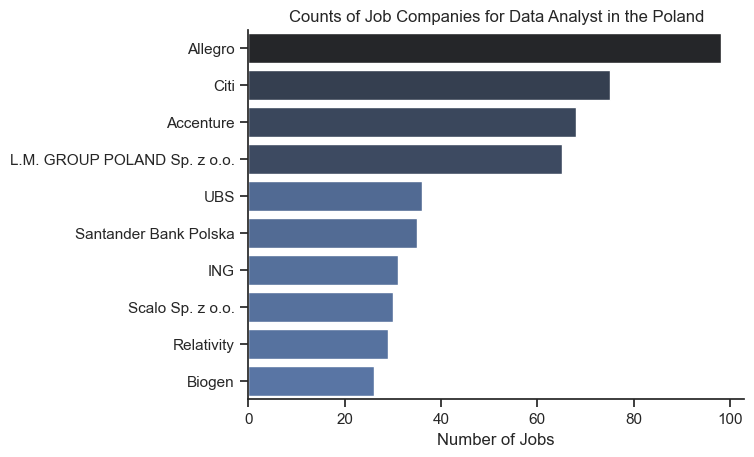

In [43]:
df_plot = df_DA_PL['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x='count', y='company_name', hue = 'count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Companies for Data Analyst in the Poland')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()